In [21]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_community.tools import TavilySearchResults,tavily_search
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
import os
load_dotenv()

True

In [22]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [23]:
tavily = TavilySearchResults()

In [24]:
class DealState(TypedDict):
  input: str
  search_results:list
  parsed_deals:list
  output:str

In [25]:
def search_with_tavily(state:DealState) -> DealState:
    query = state["input"]
    results = tavily.run(query)
    state["search_results"] = results
    return state

In [26]:
def scrape_urls(state:DealState) -> DealState:
    from bs4 import BeautifulSoup
    import requests
    import re

    deals = []
    for item in state["search_results"]:
        url = item.get("url")
        try:
            response = requests.get(url, timeout=5)
            soup = BeautifulSoup(response.text, 'html.parser')
            title = soup.title.text[:100]
            prices = re.findall(r'₹[\d,]+', soup.text)
            if prices:
                deals.append({"url": url, "title": title, "price": prices[0]})
        except:
            continue
        state["parsed_deals"] = deals

    return state 


In [27]:
def compare_deals(state: DealState) -> DealState:
    deals = state["parsed_deals"]
    table = "Title | Price | Link\n---|---|---\n"
    for deal in deals[:5]:
        table += f"{deal['title']} | {deal['price']} | [Link]({deal['url']})\n"
    state['output'] = table
    return state

In [28]:
graph = StateGraph(DealState)

graph.add_node("search",search_with_tavily)
graph.add_node("scrape_urls",scrape_urls)
graph.add_node("compare_deals",compare_deals)
graph.add_edge(START,"search")
graph.add_edge("search","scrape_urls")
graph.add_edge("scrape_urls","compare_deals")
graph.add_edge("compare_deals",END)

app = graph.compile()

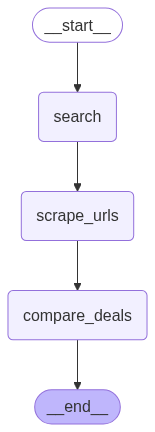

In [29]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [30]:
response = app.invoke({"input": "HP Pavilion SSD 1TP I9 processor best deals India"})
l1 = ["input","search_results","parsed_deals","output"]

for l in l1:
  print("\n\n------------------------- \n\n")
  print(response[l])






------------------------- 


HP Pavilion SSD 1TP I9 processor best deals India


------------------------- 


[{'title': 'HP 14th Generation Intel® Core™ i9 processor - SSD - 1 TB', 'url': 'https://www.hp.com/in-en/shop/sale-offers.html?cap=1-tb&filter-storagetype=ssd&processorfamily=14th-generation-intel%C2%AE-core%E2%84%A2-i9-processor', 'content': '14th Generation Intel® Core™ i9 processor > 1 TB > SSD > HP SALE, DEALS & OFFERS - Shop HP.com India\n\n===============\n\n Corporate Employees Only  Biggest PC Sale of the Season  Login Now\n\nThank you for visiting the INDIA HP Store\n\n STAY IN INDIA \n\n VIEW All STORES \n\nTech Support : 1800-258-7170 Sales :1800-108-4749 [...] SAVE ₹58,622 (15%) \n\n₹325,680(incl. of all taxes)Includes GST  ₹49,680 \n\nInterest free installment starting from \n\n₹27,140/m\n\nSave "Save item")\n\nView Details\n\nAdd to Cart\n\n7 Items\n\nShow per page\n\nVIEW\n\n15\n\n18\n\n30\n\n 1-7 of 7 Results\n\n 1-7 of 7 Results\n\nview\n\n15\n\n18)\n\n30)\n\